In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



In [2]:
# Read csv:
dfOne = pd.read_csv('cr_main.csv')

In [ ]:
# Copy of main dataframe:
df1 = dfOne.copy()

In [159]:
df1

,acidity,aftertaste,agtron,aroma,body,est_price,est_price_amount_per_measure,est_price_components,est_price_currency,est_price_full,...,review_date_full,review_month,review_rating,review_year,roast,roaster,the_bottom_line,location1,location2,location3
0,9,8,57/78,9,8,29.99,8,"29.99,8",USD,$29.99/8 ounces,...,September 2017,September,93,2017,Medium-Light,Ironclad Coffee Roasters,The Gesha character exerts a quiet but decisiv...,Richmond,Virginia,NaN
1,7,7,56/78,8,8,14.00,12,"14.00,12",USD,$14.00/12 ounces,...,September 2017,September,88,2017,Medium-Light,Espresso Republic,"The bittersweet structure, dried fruit notes a...",Chino,California,NaN
2,9,8,53/78,9,9,18.95,12,"18.95,12",USD,$18.95/12 ounces,...,October 2017,October,94,2017,Medium-Light,Paradise Roasters,An engaging ride of a Nicaragua Gesha: high-to...,Ramsey,Minnesota,NaN
3,9,9,47/65,9,9,24.50,12,"24.50,12",USD,$24.50/12 ounces,...,November 2017,November,95,2017,Medium,PT's Coffee Roasting,Mysterious and extraordinary in the Kenya styl...,Topeka,Kansas,NaN
4,9,9,52/74,9,9,18.00,12,"18.00,12",CAD,CAD $18.00/12 ounces,...,November 2017,November,94,2017,Medium-Light,Propeller Coffee,"A floral-toned, richly sweet espresso blend: b...",Toronto,Ontario,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,9,8,57/79,9,9,300.00,8,"300,8",NT,NT $300/8 ounces,...,December 2018,December,94,2018,Medium-Light,Kakalove Cafe,"A cleanly and seductively fruit-forward, richl...",Chia-Yi,Taiwan,NaN
4141,9,9,57/79,9,9,290.00,8,"290,8",NT,NT $290/8 ounces,...,December 2018,December,95,2018,Medium-Light,Kakalove Cafe,"Dynamic, engaging, classic washed Ethiopia cup...",Chia-Yi,Taiwan,NaN
4142,9,8,57/79,9,9,300.00,8,"300,8",NT,NT $300/8 ounces,...,December 2018,December,94,2018,Medium-Light,Kakalove Cafe,A harmonious Kenya that gracefully integrates ...,Chia-Yi,Taiwan,NaN
4143,9,9,56/72,9,9,15.00,250,"15.00,250",USD,$15.00/250 grams,...,December 2018,December,95,2018,Medium-Light,Coava Coffee Roasters,"A big, lavishly complex, high-toned Kenya cup ...",Portland,Oregon,NaN


In [4]:
# Split location into sub parts and assign it back to DF:
df1['location1'] = df1['location'].apply(lambda x: pd.Series(x.split(',')))[0]
df1['location2'] = df1['location'].apply(lambda x: pd.Series(x.split(',')))[1]
df1['location3'] = df1['location'].apply(lambda x: pd.Series(x.split(',')))[2]

In [8]:
# Strip spaces in location columns:
df1['location1'] = df1['location1'].str.strip()
df1['location2'] = df1['location2'].str.strip()
df1['location3'] = df1['location3'].str.strip()

In [21]:
df1[['location2']]

,location2
0,Virginia
1,California
2,Minnesota
3,Kansas
4,Ontario
...,...
4140,Taiwan
4141,Taiwan
4142,Taiwan
4143,Oregon


### Summary showing stats of all coffee data:

In [35]:
df1.describe()

,acidity,aftertaste,aroma,body,est_price,est_price_amount_per_measure,flavor,review_rating,review_year
count,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000
mean,8.062002,8.013752,8.447768,8.210374,-196.949906,-27157.028709,8.496502,91.433534,2012.779011
std,0.787061,0.774568,0.748703,0.671855,585.277501,47782.823838,0.822611,2.978443,3.979241
min,1.000000,2.000000,2.000000,5.000000,-1111.000000,-111111.000000,1.000000,63.000000,1997.000000
25%,8.000000,8.000000,8.000000,8.000000,5.030000,4.000000,8.000000,90.000000,2010.000000
50%,8.000000,8.000000,9.000000,8.000000,15.000000,12.000000,9.000000,92.000000,2013.000000
75%,9.000000,8.000000,9.000000,9.000000,19.500000,12.000000,9.000000,93.000000,2016.000000
max,10.000000,10.000000,10.000000,10.000000,5800.000000,600.000000,10.000000,98.000000,2019.000000


## Highly rated coffees

In [72]:
# DF of highly rated coffee
df1_hr=df1[df1['review_rating']>=94]


In [74]:
# Examining the stats of highly rated coffees
df1_hr.describe()


,acidity,aftertaste,aroma,body,est_price,est_price_amount_per_measure,flavor,review_rating,review_year
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,8.798570,8.660310,9.017878,8.717521,6.079642,-12553.421931,9.076281,94.567342,2014.563766
std,0.440977,0.542016,0.388885,0.517074,556.095407,35239.117066,0.527431,0.787693,3.412797
min,7.000000,7.000000,8.000000,7.000000,-1111.000000,-111111.000000,8.000000,94.000000,2005.000000
25%,9.000000,8.000000,9.000000,8.000000,15.000000,8.000000,9.000000,94.000000,2013.000000
50%,9.000000,9.000000,9.000000,9.000000,18.500000,12.000000,9.000000,94.000000,2015.000000
75%,9.000000,9.000000,9.000000,9.000000,40.250000,12.000000,9.000000,95.000000,2017.000000
max,10.000000,10.000000,10.000000,10.000000,5800.000000,500.000000,10.000000,98.000000,2019.000000


In [183]:
# Number of highly rated coffees:
df1_hr['review_rating'].count()


839

In [184]:
df_hr_top10 = df1_hr.nlargest(20, ['review_rating'])
df_hr_top10[['review_rating','product','roaster','origin','location']]

,review_rating,product,roaster,origin,location
3905,98,Elida Estate Geisha Green-Tip Natural,Dragonfly Coffee Roasters,"Boquete growing region, western Panama","Boulder, Colorado"
206,97,100% Kona SL-28,Hula Daddy Kona Coffee,"Holualoa, North Kona growing district, “Big Is...","Holualoa, Hawaii"
662,97,Panama Esmeralda Especial,PT's Coffee Roasting Co.,"Boquete growing region, western Panama","Topeka, Kansas"
774,97,Kenya Mamuto,Terroir Coffee,South-central Kenya.,"Acton, Massachusetts"
844,97,Esmeralda Especial Best of Panama,The Roasterie,"Boquete growing region, western Panama","Kansas City, Missouri"
858,97,Kenya AA Wagamuga Auction Lot,Paradise Roasters,South-central Kenya.,"Ramsey, Minnesota"
909,97,Ethiopia Biloya Special,Paradise Roasters,Southern Ethiopia,"Ramsey, Minnesota"
991,97,"Ethiopia Washed Yirgacheffe, Koke Grade 1",Simon Hsieh's Aroma Roast Coffees,"Yirgacheffe growing region, Sidamo Province, s...","Taoyuan City, Taiwan"
1226,97,“Kona Sweet” 100% Kona,Hula Daddy,"Holualoa, Hawaii","Holualoa, Hawaii"
1279,97,Guatemala Hunapu Antigua Bourbon,Temple Coffee and Tea,"Antigua valley, central Guatemala","Sacramento, California"


#### Roaster groups based on rating:

In [152]:
rr_group = df1_hr.groupby('review_rating')
rr_group.size()

review_rating
94    493
95    242
96     79
97     24
98      1
dtype: int64

#### Distribution of Roast type in highly rated coffees

In [186]:
rr_group = df1_hr.groupby('roast')
rr_group.size()

roast
Dark              3
Light           112
Medium          186
Medium-Dark      33
Medium-Light    498
No_Category       7
dtype: int64

# Visualizations

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [46]:
# Plotting histogram of roast:


df1['roast'].unique().tolist()

['Medium-Light',
 'Medium',
 'Light',
 'Medium-Dark',
 'No_Category',
 'Dark',
 'Very Dark']

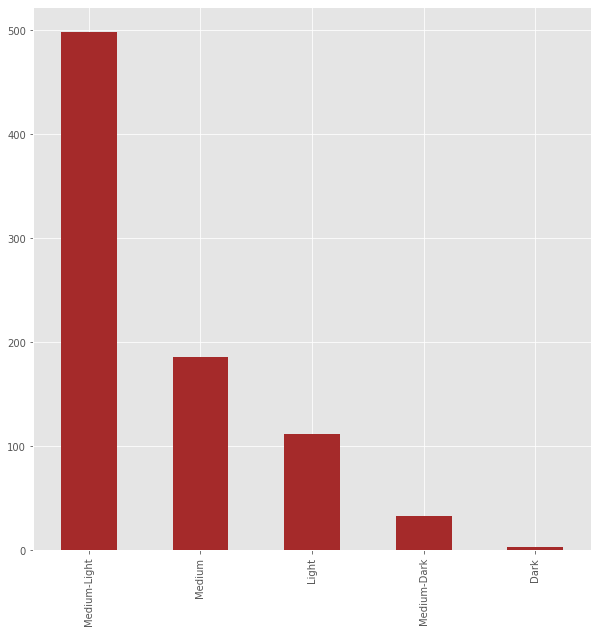

In [203]:
# visualize the amount of each class in the 'roast' categorical feature for highly rated coffees:

plt.figure(figsize=(10,10))

df_plt1 = df1_hr[df1_hr['roast']!='No_Category']

df_plt1.groupby('roast')['roast'].count().sort_values(ascending=False).plot.bar(color='brown')
plt.xlabel('')
plt.ylabel('')
plt.title('') #plt.title('Roast Concentration of highly rated coffees', fontsize=25')
plt.savefig('roast_distribution3.png')

### Correlations between coffee characteristics and coffee rating:

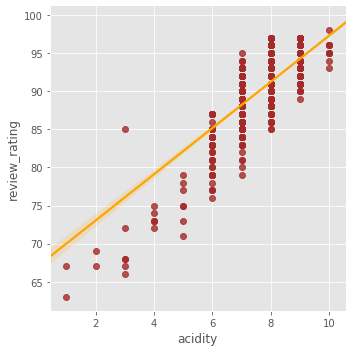

In [192]:
# Acidity and Rating:
sns.lmplot("acidity", "review_rating", df1, line_kws={'color': 'orange'}, scatter_kws={'color': 'brown'})
plt.savefig('acidity.png')

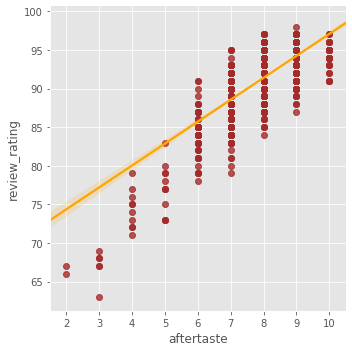

In [194]:
# Aftertaste and Rating:
sns.lmplot("aftertaste", "review_rating", df1, line_kws={'color': 'orange'}, scatter_kws={'color': 'brown'})
plt.savefig('aftertaste.png')

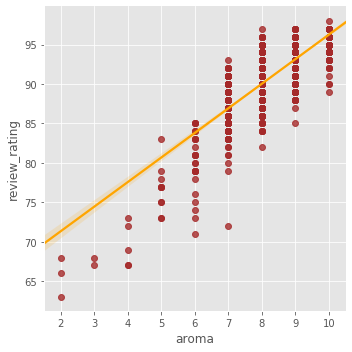

In [195]:
# Aroma and Rating:
sns.lmplot("aroma", "review_rating", df1, line_kws={'color': 'orange'}, scatter_kws={'color': 'brown'})
plt.savefig('aroma.png')

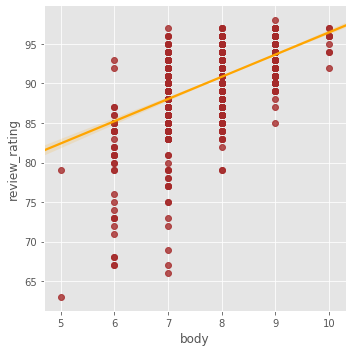

In [196]:
# Body and Rating:
sns.lmplot("body", "review_rating", df1, line_kws={'color': 'orange'}, scatter_kws={'color': 'brown'})
plt.savefig('body.png')

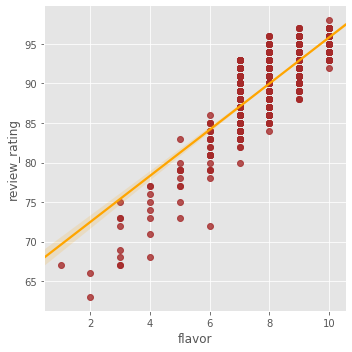

In [197]:
# Flavor and Rating:
sns.lmplot("flavor", "review_rating", df1, line_kws={'color': 'orange'}, scatter_kws={'color': 'brown'})
plt.savefig('flavor.png')

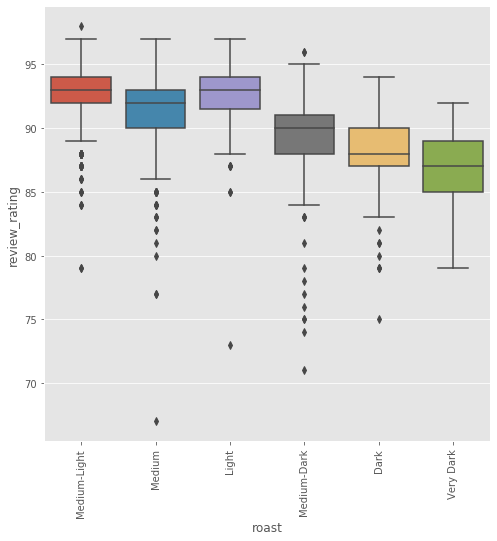

In [205]:
plt.figure(figsize=(8,8))

bxplotdf1 = sns.boxplot(x='roast', y='review_rating', data=dfplot2 )
# plt.setp(bxplotdf1.get_xticklabels(), rotation=45)


bxplotdf1.set_xticklabels(bxplotdf1.get_xticklabels(),rotation=90)
plt.savefig('rating_and_roast1.png')

### Top 20 roasters of coffee:

### Distribution of coffee rating and comparison with familiar brands

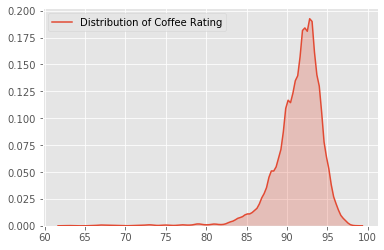

In [199]:
sns.kdeplot(df1['review_rating'], shade=True, label='Distribution of Coffee Rating')
plt.savefig('all_coffee_dist.png')

In [176]:
# Starbucks
starbucks = ['Starbucks Coffee','Starbucks', 'Starbucks Coffee (Costco)','Starbucks for the Verismo espresso system','Starbucks Reserve Roastery']
df1.roaster.isin(starbucks)
df_sb = df1[df1.roaster.isin(starbucks)]
df_sb['review_rating'].mean()

84.9

In [177]:
folgers = ['Folgers Gourmet Selections','Folgers', 'Folgers (Costco)']
df1.roaster.isin(folgers)
df_sb = df1[df1.roaster.isin(folgers)]
df_sb['review_rating'].mean()

78.16666666666667

In [178]:
stumptown = ['Stumptown Coffee Roasters']
df1.roaster.isin(stumptown)
df_sb = df1[df1.roaster.isin(stumptown)]
df_sb['review_rating'].mean()

90.14285714285714

In [179]:
peets = ['Peet\'s Coffee','Peet\'s Coffee & Tea']
df1.roaster.isin(peets)
df_sb = df1[df1.roaster.isin(peets)]
df_sb['review_rating'].mean()

88.9

In [180]:
mw = ['Maxwell House']
df1.roaster.isin(mw)
df_sb = df1[df1.roaster.isin(mw)]
df_sb['review_rating'].mean()

74.0

In [104]:
dfplot2 = df1[df1['roast']!='No_Category']

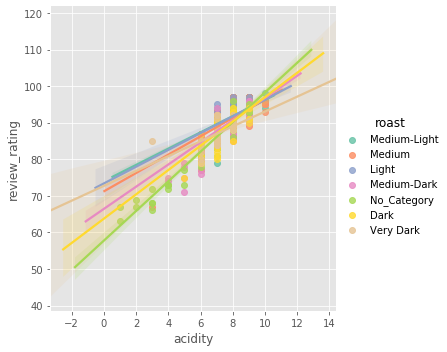

In [110]:
sns.lmplot("acidity", "review_rating", df1, hue="roast", palette="Set2")

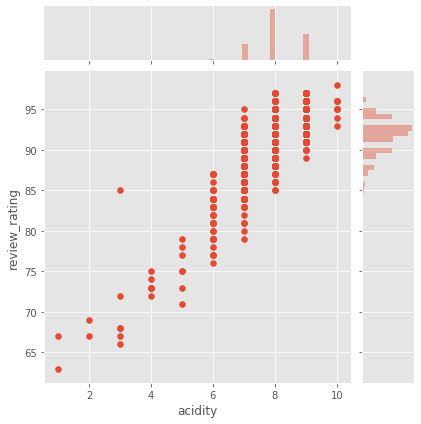

In [91]:
sns.jointplot(df1['acidity'], df1['review_rating'])

In [182]:
rr_group = df1_hr.groupby(['review_rating','roaster'])
rr_group.max()

acidity  aftertaste agtron  aroma  \
review_rating roaster                                                        
94            A.R.C.                           9           9  54/77      9   
              AHRIRE Roasting                  9           8  60/74      9   
              Allegro Coffee                   9           8  52/73      9   
              Alterra Coffee Roasters          8           8  46/53      8   
              Amavida Coffee Roasters          9           9  54/78      9   
...                                          ...         ...    ...    ...   
97            Temple Coffee and Tea            9          10  59/82     10   
              Terroir Coffee                   9           9  61/75     10   
              The Roasterie                    8           9  44/58      9   
              Wood-Fire Roasted Coffee         9          10  45/60      9   
98            Dragonfly Coffee Roasters       10           9  54/78     10   

                                         body  est_price  \
review_rating roaster                                      
94            A.R.C.                        9     158.00   
              AHRIRE Roasting               9     234.00   
              Allegro Coffee                9      13.99   
              Alterra Coffee Roasters       8   -1111.00   
              Amavida Coffee Roasters       9      19.95   
...                                       ...        ...   
97            Temple Coffee and Tea         9      62.00   
              Terroir Coffee                9      16.50   
              The Roasterie                 8   -1111.00   
              Wood-Fire Roasted Coffee      9      22.00   
98            Dragonfly Coffee Roasters     9     100.00   

                                         est_price_amount_per_measure  \
review_rating roaster                                                   
94            A.R.C.                                              227   
              AHRIRE Roasting                                     150   
              Allegro Coffee                                       12   
              Alterra Coffee Roasters                         -111111   
              Amavida Coffee Roasters                              12   
...                                                               ...   
97            Temple Coffee and Tea                                12   
              Terroir Coffee                                       12   
              The Roasterie                                   -111111   
              Wood-Fire Roasted Coffee                             16   
98            Dragonfly Coffee Roasters                            21   

                                        est_price_components  \
review_rating roaster                                          
94            A.R.C.                                 158,227   
              AHRIRE Roasting                      75.00,150   
              Allegro Coffee                        13.99,12   
              Alterra Coffee Roasters               ZZZZZZZZ   
              Amavida Coffee Roasters                19.95,8   
...                                                      ...   
97            Temple Coffee and Tea                  62.00,8   
              Terroir Coffee                        ZZZZZZZZ   
              The Roasterie                         ZZZZZZZZ   
              Wood-Fire Roasted Coffee              22.00,16   
98            Dragonfly Coffee Roasters            100.00,21   

                                        est_price_currency  \
review_rating roaster                                        
94            A.R.C.                                   HKD   
              AHRIRE Roasting                          RMB   
              Allegro Coffee                           USD   
              Alterra Coffee Roasters             ZZZZZZZZ   
              Amavida Coffee Roasters                  USD   
...                         

In [144]:
country_group = df1_hr_g.groupby('location2') 
country_group.size()

location2
Alaska                1
Alberta               2
Arizona               1
British Columbia      3
California          139
Californiaa           1
Chia-Yi               1
China                12
Colorado             47
Connecticut          13
DC                    1
El Salvador           1
England               2
Florida              10
Georgia               1
Hawaii               20
Hong Kong             1
Idaho                 1
Illinois             11
Kansas               25
Kentucky              1
Louisiana             1
MInnesota             3
MIssissippi           1
MIssouri              1
Maine                 3
Maryland              1
Massachusetts        37
Maui                  1
Minnesota            21
Mississippi           2
Montana               8
Montana.              1
Nevada                1
New Hampshire        15
New Jersey            6
New York             11
North Carolina        4
Oaxaca                1
Ohio                  6
Oklahoma              7
Ontari

---

### Archive:

In [131]:
# Roaster of the top 10 rated coffees:

df1_hr
df_plt1 = df1_hr[df1_hr['roaster']!='No_Category']


,acidity,aftertaste,agtron,aroma,body,est_price,est_price_amount_per_measure,est_price_components,est_price_currency,est_price_full,...,review_date_full,review_month,review_rating,review_year,roast,roaster,the_bottom_line,location1,location2,location3
2,9,8,53/78,9,9,18.95,12,"18.95,12",USD,$18.95/12 ounces,...,October 2017,October,94,2017,Medium-Light,Paradise Roasters,An engaging ride of a Nicaragua Gesha: high-to...,Ramsey,Minnesota,NaN
3,9,9,47/65,9,9,24.50,12,"24.50,12",USD,$24.50/12 ounces,...,November 2017,November,95,2017,Medium,PT's Coffee Roasting,Mysterious and extraordinary in the Kenya styl...,Topeka,Kansas,NaN
4,9,9,52/74,9,9,18.00,12,"18.00,12",CAD,CAD $18.00/12 ounces,...,November 2017,November,94,2017,Medium-Light,Propeller Coffee,"A floral-toned, richly sweet espresso blend: b...",Toronto,Ontario,Canada
6,9,9,53/85,9,9,60.00,8,"60.00,8",USD,$60.00/8 ounces,...,December 2017,December,95,2017,Medium-Light,PT's Coffee Roasting,A symphonic Gesha cup: high-toned fruit and fl...,Topeka,Kansas,NaN
9,9,8,65/91,9,9,15.00,12,"15.00,12",USD,$15.00/12 ounces,...,March 2018,March,94,2018,Light,Big Shoulders Coffee,"A complex, richly layered, juicy-sweet Kenya cup.",Chicago,Illinois,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,9,9,55/75,9,9,30.00,250,"30.00,250",USD,$30.00/250 grams,...,December 2018,December,96,2018,Medium-Light,Bar Nine,"A knockout fruit-bomb of a Gesha cup, processe...",Los Angeles,California,NaN
4140,9,8,57/79,9,9,300.00,8,"300,8",NT,NT $300/8 ounces,...,December 2018,December,94,2018,Medium-Light,Kakalove Cafe,"A cleanly and seductively fruit-forward, richl...",Chia-Yi,Taiwan,NaN
4141,9,9,57/79,9,9,290.00,8,"290,8",NT,NT $290/8 ounces,...,December 2018,December,95,2018,Medium-Light,Kakalove Cafe,"Dynamic, engaging, classic washed Ethiopia cup...",Chia-Yi,Taiwan,NaN
4142,9,8,57/79,9,9,300.00,8,"300,8",NT,NT $300/8 ounces,...,December 2018,December,94,2018,Medium-Light,Kakalove Cafe,A harmonious Kenya that gracefully integrates ...,Chia-Yi,Taiwan,NaN


In [45]:
# Replace nan in roast with "NoCategory"


df1['roast'].fillna('No_Category', inplace=True)



Text(0.5, 1.0, 'Roast Concentration')

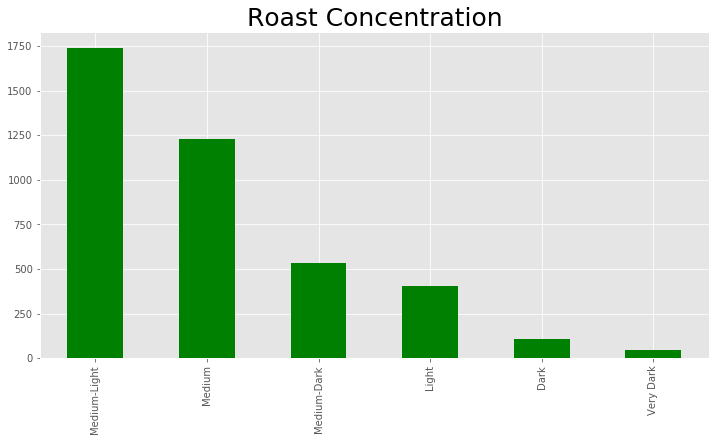

In [108]:
# visualize the amount of each class in the 'roast' categorical feature:

plt.figure(figsize=(12,6))

df_plt1 = df1[df1['roast']!='No_Category']

df_plt1.groupby('roast')['roast'].count().sort_values(ascending=False).plot.bar(color='g')
plt.xlabel('')
plt.ylabel('')
plt.title('Roast Concentration', fontsize=25)


### Roast Concentration

Text(0.5, 1.0, 'Relationship between Rating and Aroma')

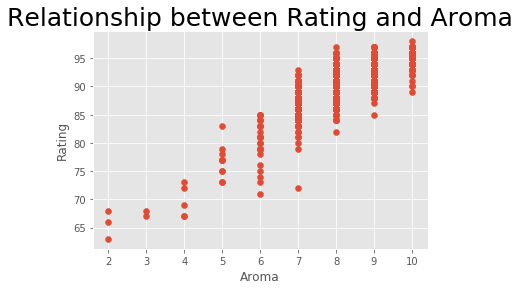

In [79]:
# Relationship: Rating and Aroma (all coffee)


plt.scatter(df1['aroma'], df1['review_rating'])
plt.xlabel('Aroma')
plt.ylabel('Rating')
plt.title('Relationship between Rating and Aroma', fontsize=25)

Text(0, 0.5, 'Rating')

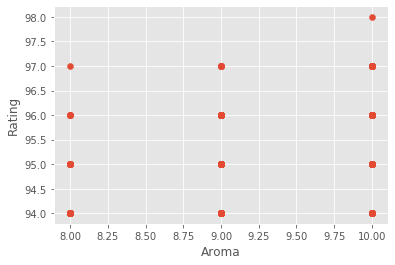

In [78]:
plt.scatter(df1_hr['aroma'], df1_hr['review_rating'])
plt.xlabel('Aroma')
plt.ylabel('Rating')

Text(0.5, 1.0, 'Relationship between Rating and Body')

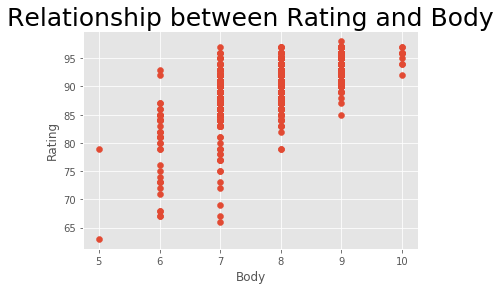

In [80]:
# Relationship: Rating and Body (all coffee)


plt.scatter(df1['body'], df1['review_rating'])
plt.xlabel('Body')
plt.ylabel('Rating')
plt.title('Relationship between Rating and Body', fontsize=25)

Text(0.5, 1.0, 'Relationship between Rating and Acidity')

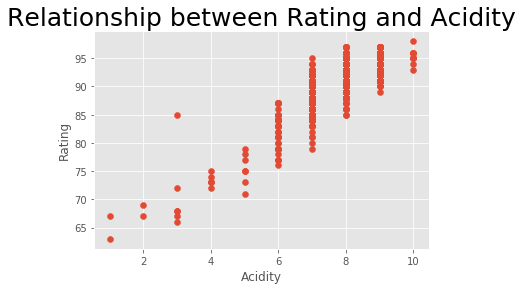

In [81]:
# Relationship: Rating and Acidity (all coffee)


plt.scatter(df1['acidity'], df1['review_rating'])
plt.xlabel('Acidity')
plt.ylabel('Rating')
plt.title('Relationship between Rating and Acidity', fontsize=25)

Text(0.5, 1.0, 'Relationship between Rating and Aftertaste')

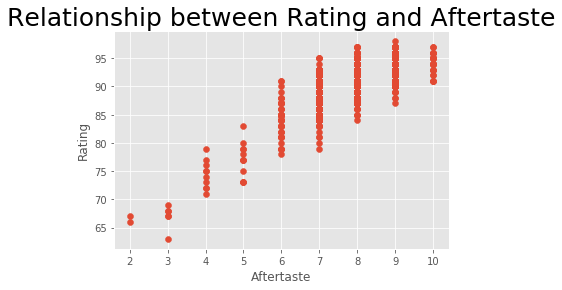

In [82]:
# Relationship: Rating and Aftertaste (all coffee)


plt.scatter(df1['aftertaste'], df1['review_rating'])
plt.xlabel('Aftertaste')
plt.ylabel('Rating')
plt.title('Relationship between Rating and Aftertaste', fontsize=25)

Text(0, 0.5, 'Rating')

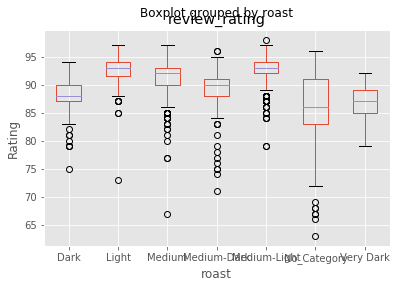

In [83]:
# Boxplot

df_score = df1[['roast', 'review_rating']]
df_score.boxplot(by='roast', column='review_rating')
plt.ylabel('Rating')